end_date is initialized to "2020-10-02"


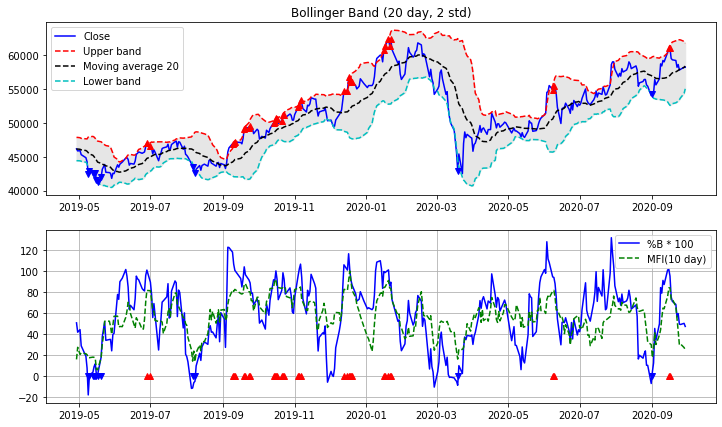

In [1]:
# 볼린저밴드 추종매매법(국내)

import matplotlib.pyplot as plt
from Investar import Analyzer
%matplotlib inline

mk = Analyzer.MarketDB()
df = mk.get_daily_price('삼성전자', '2019-04-02')

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close'])/3
df['PMF'] = 0
df['NMF'] = 0

for i in range(len(df.close)-1): #0부터 종가의 개수 -2까지
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MFI10'] = 100 - 100 / (1+df['MFR'])

df = df[19:]

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color = '#0000ff', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best')
plt.title('Bollinger Band (20 day, 2 std)')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')

plt.subplot(2,1,2)
plt.plot(df.index, df['PB']*100, 'b', label = '%B * 100')
plt.plot(df.index, df['MFI10'], 'g--', label = 'MFI(10 day)')
plt.yticks([-20, 0 , 20, 40, 60, 80, 100, 120])
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


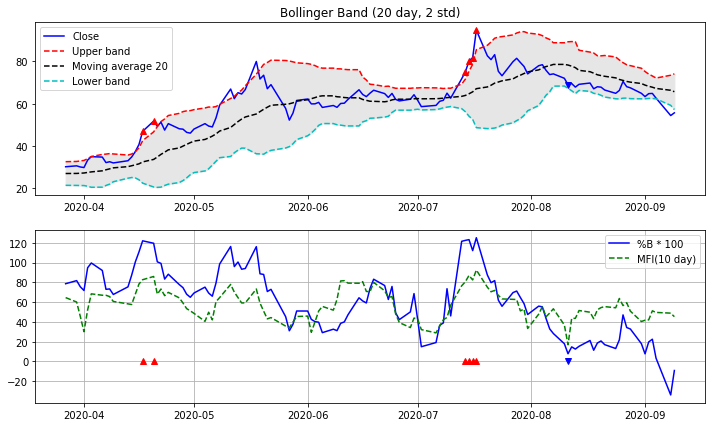

In [23]:
#볼린저밴드 추종 매매법(해외)
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo('MRNA', start = '2020-03-02')
df = df.rename(columns = {'Open' : 'open', 'High' : 'high', 'Low' : 'low' , 'Adj Close' : 'close', 'Volume' : 'volume'})
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close'])/3
df['PMF'] = 0
df['NMF'] = 0

for i in range(len(df.close)-1): #0부터 종가의 개수 -2까지
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MFI10'] = 100 - 100 / (1+df['MFR'])

df = df[19:]

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color = '#0000ff', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best')
plt.title('Bollinger Band (20 day, 2 std)')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')

plt.subplot(2,1,2)
plt.plot(df.index, df['PB']*100, 'b', label = '%B * 100')
plt.plot(df.index, df['MFI10'], 'g--', label = 'MFI(10 day)')
plt.yticks([-20, 0 , 20, 40, 60, 80, 100, 120])
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

end_date is initialized to "2020-09-09"


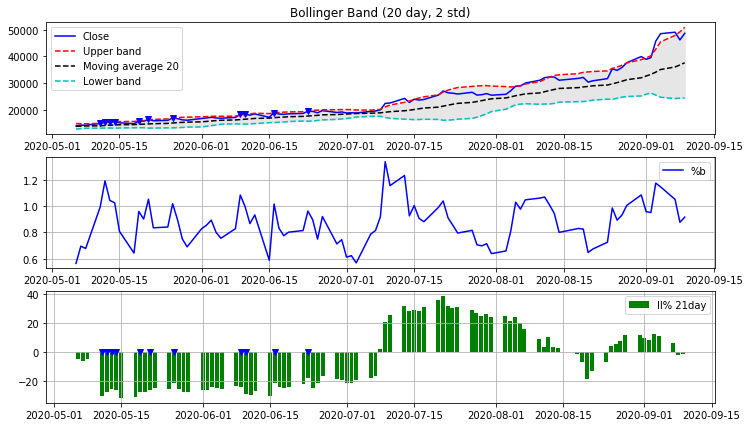

In [3]:
#볼린저밴드 반전 매매법(국내)
import matplotlib.pyplot as plt
from Investar import Analyzer
%matplotlib inline

mk = Analyzer.MarketDB()
df = mk.get_daily_price('한화솔루션', '2020-04-02')

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower'])

df['II'] = (2*df['close'] - df['high'] - df['low']) / (df['high'] - df['low']) * df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum() / df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(12,7))
plt.subplot(3,1,1)
plt.plot(df.index, df['close'], color = '#0000ff', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0,len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc='best')
plt.title('Bollinger Band (20 day, 2 std)')

plt.subplot(3,1,2)
plt.plot(df.index, df['PB'], 'b', label = '%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.bar(df.index, df['IIP21'], color = 'g', label = 'II% 21day')
for i in range(0,len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


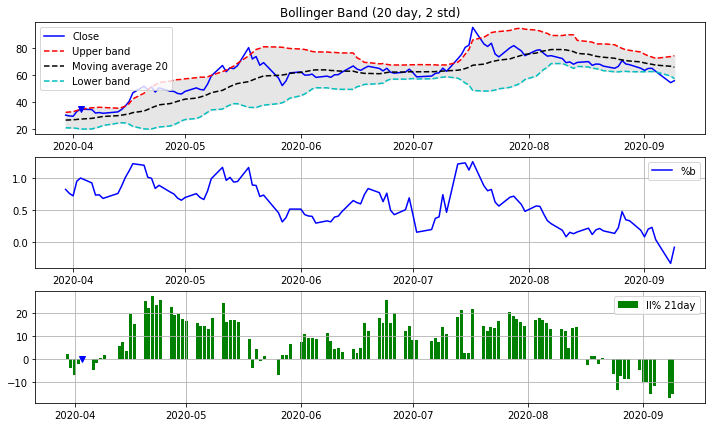

In [24]:
#볼린저밴드 반전매매법(해외)
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo('MRNA', start = '2020-03-02')
df = df.rename(columns = {'Open' : 'open', 'High' : 'high', 'Low' : 'low' , 'Adj Close' : 'close', 'Volume' : 'volume'})

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower'])

df['II'] = (2*df['close'] - df['high'] - df['low']) / (df['high'] - df['low']) * df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum() / df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(12,7))
plt.subplot(3,1,1)
plt.plot(df.index, df['close'], color = '#0000ff', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0,len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc='best')
plt.title('Bollinger Band (20 day, 2 std)')

plt.subplot(3,1,2)
plt.plot(df.index, df['PB'], 'b', label = '%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.bar(df.index, df['IIP21'], color = 'g', label = 'II% 21day')
for i in range(0,len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

end_date is initialized to "2020-09-10"


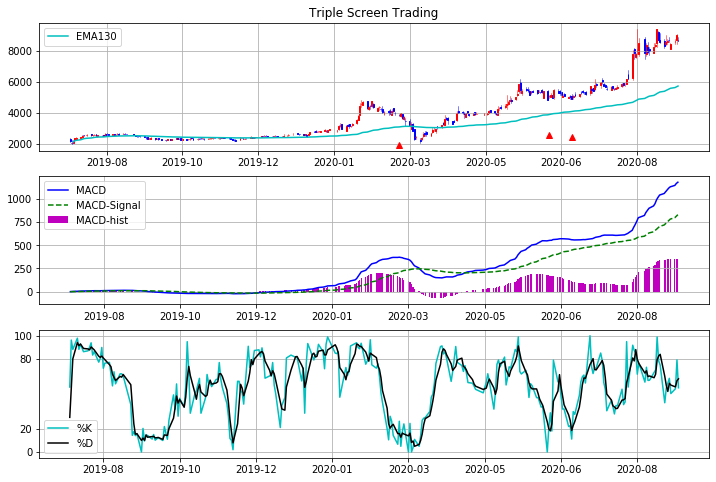

In [20]:
#삼중창 매매법(국내)
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('씨아이에스', '2019-08-03')

ema60 = df.close.ewm(span=60).mean() #종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() #종가의 26주 지수 이동 평균
macd = ema60 - ema130 #MACD선
signal = macd.ewm(span=45).mean() #신호선(MACD의 9주 이동평균) , 이러면 MACD의 속도 > signal의 속도로, MACD가 signal가 만날때 신호가 발생
macdhist = macd - signal #MACD 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()

df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number', 'open', 'high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max() #14일동안의 최대값; min_periods=1은 데이터가 1개만 있어도 최대값을 구하라는 의미
ndays_low = df.low.rolling(window=14, min_periods=1).min()
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100 #% K선
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k = fast_k, slow_d = slow_d).dropna()

plt.figure(figsize=(12,8))
p1 = plt.subplot(3,1,1)
plt.title('Triple Screen Trading')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup = 'red', colordown = 'blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color = 'c', label = 'EMA130')
plt.legend(loc = 'best')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and df.slow_d.values[i-1] >=20 and df.slow_d.values[i] < 20:
        plt.plot(df.number.values[i], df.close.values[i]/2, 'r^')
    elif df.ema130.values[i-1] > df.ema130.values[i] and df.slow_d.values[i-1] <=80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], df.close.values[i]/2, 'bv')

p2 = plt.subplot(3,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label ='MACD-hist')
plt.plot(df.number, df['macd'], color = 'b', label = 'MACD')
plt.plot(df.number, df['signal'], 'g--', label = 'MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3,1,3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color = 'c', label='%K')
plt.plot(df.number, df['slow_d'], color = 'k', label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()


[*********************100%***********************]  1 of 1 completed


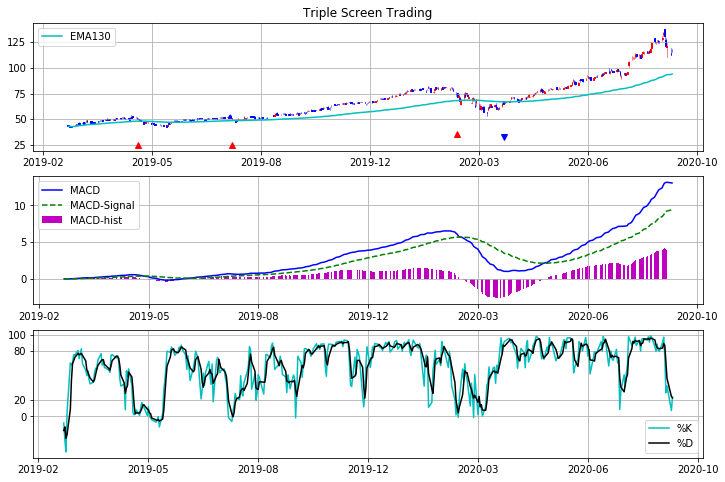

In [37]:
#삼중창 매매법(해외)
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo('AAPL', start = '2019-03-02')
df = df.rename(columns = {'Open' : 'open', 'High' : 'high', 'Low' : 'low' , 'Adj Close' : 'close', 'Volume' : 'volume'})

ema60 = df.close.ewm(span=60).mean() #종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() #종가의 26주 지수 이동 평균
macd = ema60 - ema130 #MACD선
signal = macd.ewm(span=45).mean() #신호선(MACD의 9주 이동평균) , 이러면 MACD의 속도 > signal의 속도로, MACD가 signal가 만날때 신호가 발생
macdhist = macd - signal #MACD 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()

df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number', 'open', 'high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max() #14일동안의 최대값; min_periods=1은 데이터가 1개만 있어도 최대값을 구하라는 의미
ndays_low = df.low.rolling(window=14, min_periods=1).min()
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100 #% K선
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k = fast_k, slow_d = slow_d).dropna()

plt.figure(figsize=(12,8))
p1 = plt.subplot(3,1,1)
plt.title('Triple Screen Trading')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup = 'red', colordown = 'blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color = 'c', label = 'EMA130')
plt.legend(loc = 'best')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and df.slow_d.values[i-1] >=20 and df.slow_d.values[i] < 20:
        plt.plot(df.number.values[i], df.close.values[i]/2, 'r^')
    elif df.ema130.values[i-1] > df.ema130.values[i] and df.slow_d.values[i-1] <=80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], df.close.values[i]/2, 'bv')

p2 = plt.subplot(3,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label ='MACD-hist')
plt.plot(df.number, df['macd'], color = 'b', label = 'MACD')
plt.plot(df.number, df['signal'], 'g--', label = 'MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3,1,3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color = 'c', label='%K')
plt.plot(df.number, df['slow_d'], color = 'k', label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()